## **UEFA EURO 2021**
### Prediction for winner using [FIFA21 Data](https://www.kaggle.com/stefanoleone992/fifa-21-complete-player-dataset) by [Boysen Mutembwa](https://www.linkedin.com/in/boysenmutembwa/)

In [3]:

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.offline import iplot, init_notebook_mode
from geopy.geocoders import Nominatim
import plotly.plotly as py

ImportError: 
The plotly.plotly module is deprecated,
please install the chart-studio package and use the
chart_studio.plotly module instead. 


# **1. Preparation**

### **1.1 Load Data**

In [4]:
EURO21 = pd.read_csv('FIFA21_official_data.csv', low_memory=False)
EURO21.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Best_Position', 'Best_Overall_Rating', 'Release Clause',
       'DefensiveAwareness'],
      dtype='object')

Let's have a look at the most relevant columns in the loaded dataset:

In [5]:
interesting_columns = [
    'Name', 
    'Age',  
    'Nationality', 
    'Best_Overall_Rating', 
    'Potential', 
    'Club', 
    'Value', 
    'Wage', 
    'Best_Position'
]
EURO21 = pd.DataFrame(EURO21, columns=interesting_columns)
EURO21['Best_Overall_Rating'] = EURO21.Best_Overall_Rating.astype(int)


<br>

### **1.2 Summarize Data**



In [6]:
EURO21.head()

,Name,Age,Nationality,Best_Overall_Rating,Potential,Club,Value,Wage,Best_Position
0,L. Suárez,33,Uruguay,87,87,Atlético Madrid,€31.5M,€115K,ST
1,K. De Bruyne,29,Belgium,91,91,Manchester City,€87M,€370K,CAM
2,Bruno Fernandes,25,Portugal,88,90,Manchester United,€63M,€195K,CAM
3,A. Griezmann,29,France,87,87,FC Barcelona,€50.5M,€290K,ST
4,M. Acuña,28,Argentina,83,83,Sevilla FC,€22M,€41K,LB


In [7]:
EURO21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17108 entries, 0 to 17107
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name                 17108 non-null  object
 1   Age                  17108 non-null  int64 
 2   Nationality          17108 non-null  object
 3   Best_Overall_Rating  17108 non-null  int32 
 4   Potential            17108 non-null  int64 
 5   Club                 16783 non-null  object
 6   Value                17108 non-null  object
 7   Wage                 17108 non-null  object
 8   Best_Position        17108 non-null  object
dtypes: int32(1), int64(2), object(6)
memory usage: 1.1+ MB


<br>

### **1.3 Process Data**

Seeing that the values in columns 'Value' and 'Wage' are objects rather than numbers. I will process the data in order to the values in those two columns to integers, I'll utilise a simple helper function. I will have two new columns, 'nValue' and 'nWage,' each containing a numeric value.

In [8]:
def str2number(amount):
    if amount[-1] == 'M':
        return float(amount[1:-1])*1000000
    elif amount[-1] == 'K':
        return float(amount[1:-1])*1000
    else:
        return float(amount[1:])
    
EURO21['nValue'] = EURO21['Value'].apply(lambda x: str2number(x))
EURO21['nWage'] = EURO21['Wage'].apply(lambda x: str2number(x))

<br>

# **2. Data visualisation**

### **2.1 Age of Soccer players**

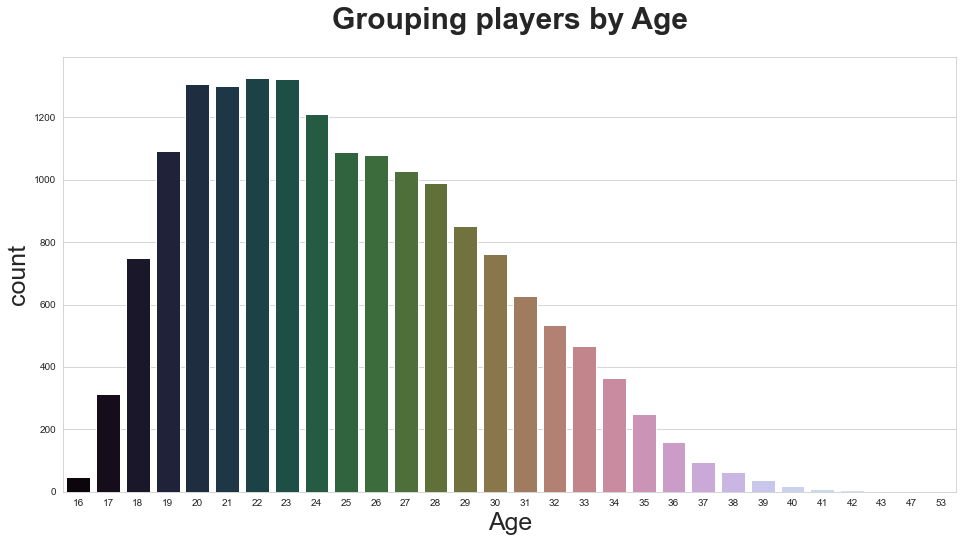

In [9]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Grouping players by Age', fontsize=30, fontweight='bold', y=1.05,)
plt.xlabel('Number of players', fontsize=25)
plt.ylabel('Players Age', fontsize=25)
sns.countplot(x="Age", data=EURO21, palette="cubehelix");
plt.show()

<br>

### **2.2 Best Overall Rating on Fifa21**

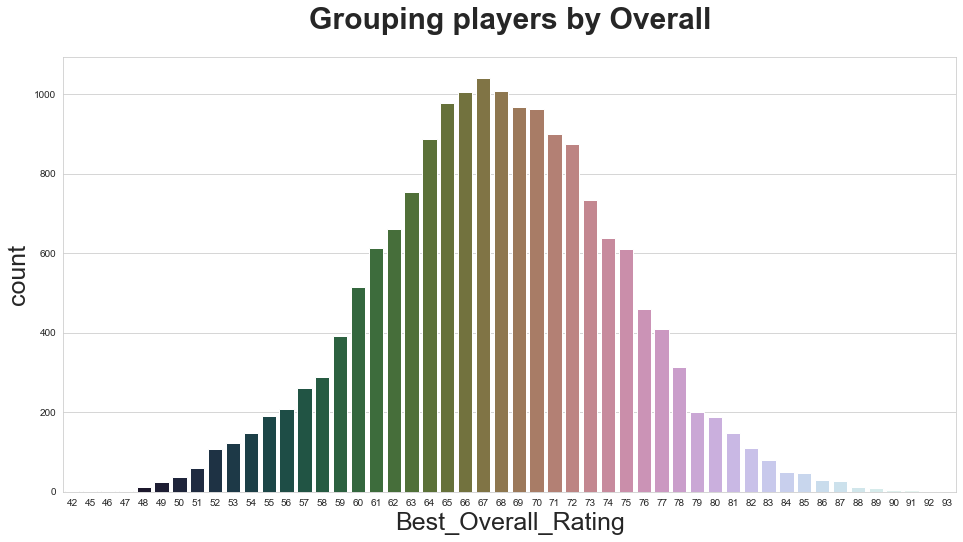

In [10]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Grouping players by Overall', fontsize=30, fontweight='bold', y=1.05,)
plt.xlabel('Number of players', fontsize=25)
plt.ylabel('Players Age', fontsize=25)
sns.countplot(x="Best_Overall_Rating", data=EURO21, palette="cubehelix");
plt.show()

<br>

### **2.3 Best Position for each player** 

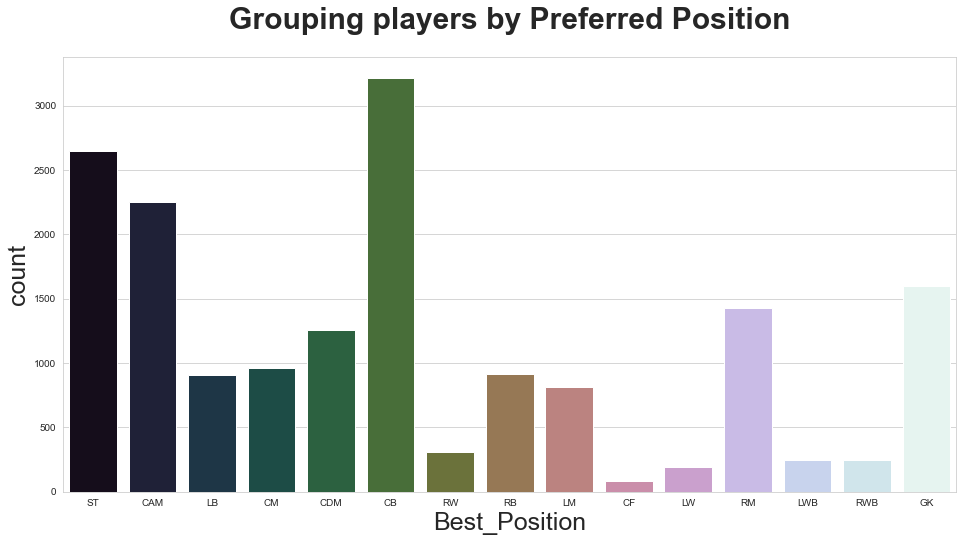

In [11]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Grouping players by Preferred Position', fontsize=30, fontweight='bold', y=1.05,)
plt.xlabel('Number of players', fontsize=25)
plt.ylabel('Players Age', fontsize=25)
sns.countplot(x="Best_Position", data=EURO21, palette="cubehelix");
plt.show()

<br>

### **2.4 Nationality of Players**

In [12]:
EURO21["Nationality"].value_counts().head(30)

England                1730
Germany                1166
Spain                  1106
France                  997
Brazil                  811
Argentina               772
Italy                   559
Netherlands             460
Mexico                  369
Portugal                368
United States           351
Uruguay                 321
Poland                  306
Scotland                296
Japan                   291
Colombia                283
Belgium                 282
Republic of Ireland     272
Norway                  269
Sweden                  251
Austria                 246
Turkey                  243
Denmark                 242
Switzerland             203
Chile                   190
Romania                 183
Paraguay                173
Venezuela               158
Croatia                 151
Australia               145
Name: Nationality, dtype: int64

>

To be precise, I wil be inspecting at 10 teams with the highest betting odds in [Europe](https://www.sportsbettingdime.com/soccer/euro-championship-odds/#tab-sbd-chart-container-187184-60b57c5b2237b):
* Portugal (Previous Winner)
* Beglium
* Russia
* France
* England
* Italy
* Netherlands
* Spain
* Croatia 
* Germany

<br>

### **2.5 Value of Players**

In [13]:
sorted_players = EURO21.sort_values(["nValue"], ascending=False)
europe= ["Portugal",'Beglium',"Russia",'France','England','Italy','Netherlands','Spain','Croatia',"Switzerland"]
filt=sorted_players[sorted_players.Nationality.isin(europe)].head(20)
players = filt[["Name" ,"Age" ,"Nationality","Best_Position" ,"Value"]].values



### Highest valued players in Europe

In [14]:
from IPython.display import HTML, display

table_content = ''
for row in players:
    HTML_row = '<tr>'
    HTML_row += '<td>' + str(row[0]) + '</td>'
    HTML_row += '<td>' + str(row[1]) + '</td>'
    HTML_row += '<td>' + str(row[2]) + '</td>'
    HTML_row += '<td>' + str(row[3]) + '</td>'
    HTML_row += '<td>' + str(row[4]) + '</td>'
    /
    
    table_content += HTML_row + '</tr>'

display(HTML(
    '<table><tr><th>Name</th><th>Age</th><th>Nationality</th><th>Position</th><th>Value</th></tr>{}</table>'.format(table_content))
)

Name,Age,Nationality,Position,Value
K. Mbappé,21,France,ST,€105.5M
V. van Dijk,28,Netherlands,CB,€75.5M
R. Sterling,25,England,LW,€72.5M
H. Kane,26,England,ST,€71M
J. Sancho,20,England,CAM,€69.5M
Bruno Fernandes,25,Portugal,CAM,€63M
T. Alexander-Arnold,21,England,RB,€60M
Bernardo Silva,25,Portugal,RW,€60M
A. Laporte,26,France,CB,€56M
M. Rashford,22,England,RM,€53M


Let's make a scatter chart of the players' Value with respect to their Age and Overall:

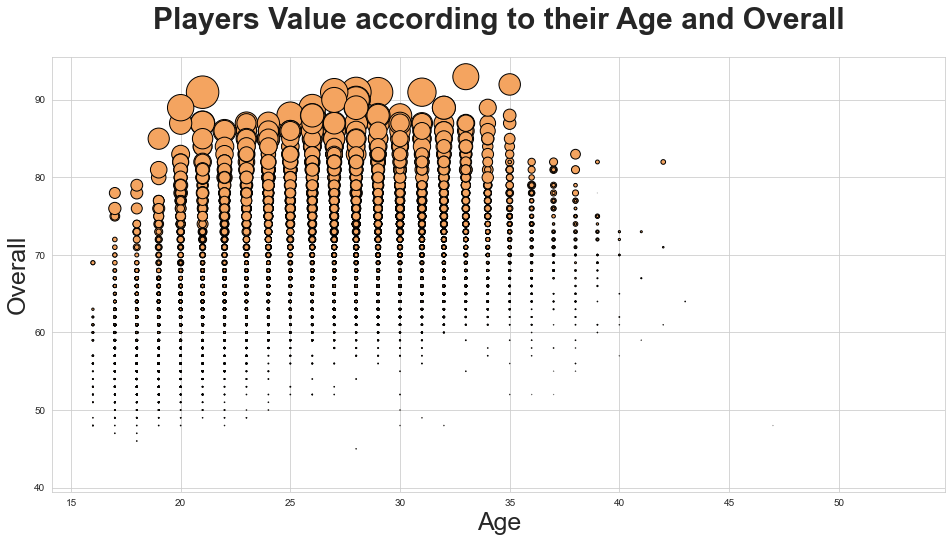

In [15]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Players Value according to their Age and Overall', fontsize=30, fontweight='bold', y=1.05,)
plt.xlabel('Age', fontsize=25)
plt.ylabel('Overall', fontsize=25)

age = EURO21["Age"].values
overall = EURO21["Best_Overall_Rating"].values
value = EURO21["nValue"].values

plt.scatter(age, overall, s = value/100000, edgecolors='black', c='sandybrown')
plt.show()

<br>

### **2.6 Wages**

**Highest paid players in Europe**

In [16]:
sorted_players = EURO21.sort_values(["nWage"], ascending=False)
europe= ["Portugal",'Beglium',"Russia",'France','England','Italy','Netherlands','Spain','Croatia',"Switzerland"]
filt=sorted_players[sorted_players.Nationality.isin(europe)].head(20)
players = filt[["Name" ,"Age" ,"Nationality","Best_Position" ,"Wage"]].values


In [17]:
from IPython.display import HTML, display

table_content = ''
for row in players:
    HTML_row = '<tr>'
    HTML_row += '<td>' + str(row[0]) + '</td>'
    HTML_row += '<td>' + str(row[1]) + '</td>'
    HTML_row += '<td>' + str(row[2]) + '</td>'
    HTML_row += '<td>' + str(row[3]) + '</td>'
    HTML_row += '<td>' + str(row[4]) + '</td>'
    /
    
    table_content += HTML_row + '</tr>'

display(HTML(
    '<table><tr><th>Name</th><th>Age</th><th>Nationality</th><th>Position</th><th>Wage</th></tr>{}</table>'.format(table_content))
)

Name,Age,Nationality,Position,Wage
K. Benzema,32,France,CF,€350K
Sergio Ramos,34,Spain,CB,€300K
A. Griezmann,29,France,ST,€290K
R. Sterling,25,England,LW,€270K
L. Modrić,34,Croatia,CM,€260K
Sergio Busquets,31,Spain,CDM,€240K
Bernardo Silva,25,Portugal,RW,€230K
Carvajal,28,Spain,RB,€230K
Piqué,33,Spain,CB,€220K
R. Varane,27,France,CB,€220K


Let's make a scatter chart of the players' Wage with respect to their Age and Overall

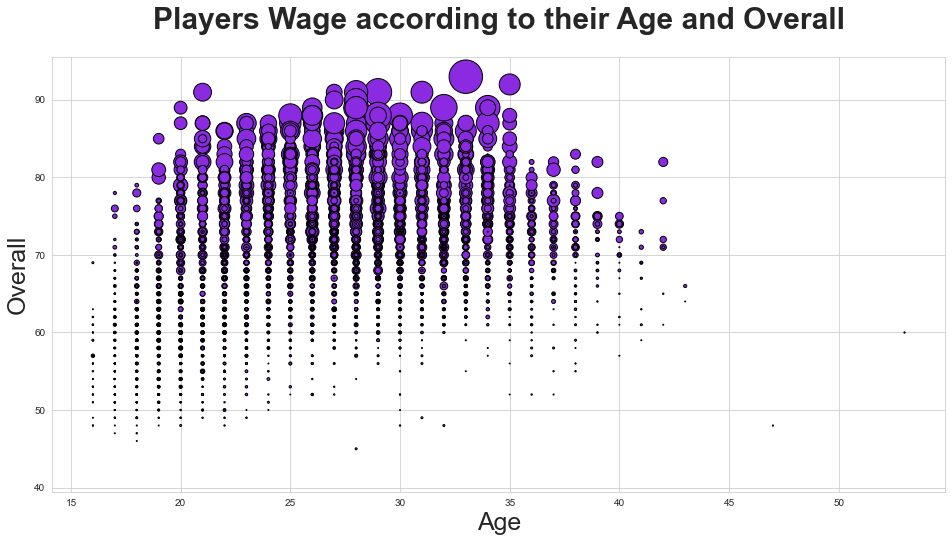

In [18]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Players Wage according to their Age and Overall', fontsize=30, fontweight='bold', y=1.05,)
plt.xlabel('Age', fontsize=25)
plt.ylabel('Overall', fontsize=25)

age = EURO21["Age"].values
overall = EURO21["Best_Overall_Rating"].values
value = EURO21["nWage"].values

plt.scatter(age, overall, s = value/500, edgecolors='black', color="blueviolet")
plt.show()

<br>

# **3. Best European Teams Analysis**

In [19]:

europe= ["Portugal",'Beglium',"Russia",'France','England','Italy','Netherlands','Spain','Croatia',"Switzerland"]
filt=EURO21[EURO21.Nationality.isin(europe)]
EURO= filt[['Name', 'Age', 'Nationality', 'Best_Overall_Rating', 'Potential', 'Best_Position', 'Value', 'Wage']]
EURO.head(10)

,Name,Age,Nationality,Best_Overall_Rating,Potential,Best_Position,Value,Wage
2,Bruno Fernandes,25,Portugal,88,90,CAM,€63M,€195K
3,A. Griezmann,29,France,87,87,ST,€50.5M,€290K
9,G. Wijnaldum,29,Netherlands,85,85,CM,€37M,€150K
11,Sergio Ramos,34,Spain,89,89,CB,€24.5M,€300K
13,L. Modrić,34,Croatia,87,87,CM,€24.5M,€260K
17,P. Pogba,27,France,86,87,CM,€50M,€190K
19,A. Florenzi,29,Italy,81,81,RB,€14.5M,€84K
21,Jordi Alba,31,Spain,86,86,LB,€32M,€220K
22,Cristiano Ronaldo,35,Portugal,92,92,ST,€46M,€220K
24,J. Henderson,30,England,86,86,CDM,€36.5M,€140K


<br>

### **3.1 Squad of Highest Overall players**

What's the best European Squad according to FIFA 21 purely based on overall rating?

In [20]:
def get_best_squad_n(formation, nationality, measurement='Best_Overall_Rating'):
    EURO21_copy = EURO21.copy()
    EURO21_copy = EURO21_copy[EURO21_copy['Nationality'] == nationality]
    store = []

    for i in formation:
        store.append([
            EURO21_copy.loc[[EURO21_copy[EURO21_copy['Best_Position'].str.contains(i)][measurement].idxmax()]][
                'Best_Position'].to_string(index=False),
            EURO21_copy.loc[[EURO21_copy[EURO21_copy['Best_Position'].str.contains(i)][measurement].idxmax()]][
                'Name'].to_string(index=False),
            EURO21_copy[EURO21_copy['Best_Position'].str.contains(i)][measurement].max(),
            EURO21_copy.loc[[EURO21_copy[EURO21_copy['Best_Position'].str.contains(i)][measurement].idxmax()]][
                'Age'].to_string(index=False),
             EURO21_copy.loc[[EURO21_copy[EURO21_copy['Best_Position'].str.contains(i)][measurement].idxmax()]]['Club'].to_string(index = False),
            EURO21_copy.loc[[EURO21_copy[EURO21_copy['Best_Position'].str.contains(i)][measurement].idxmax()]][
                'Value'].to_string(index=False),
            EURO21_copy.loc[[EURO21_copy[EURO21_copy['Best_Position'].str.contains(i)][measurement].idxmax()]][
                'Wage'].to_string(index=False)
        ])

        EURO21_copy.drop(EURO21_copy[EURO21_copy['Best_Position'].str.contains(i)][measurement].idxmax(),
                         inplace=True)

    return np.mean([x[2] for x in store]).round(2), pd.DataFrame(np.array(store).reshape(11, 7),
                                                                 columns=['Best_Position', 'Player', measurement, 'Age',
                                                                          'Club', 'Value', 'Wage']).to_string(
        index=False)

In [21]:
def get_summary_n(squad_list, squad_name, nationality_list):
    summary = []

    for i in nationality_list:
        count = 0
        for j in squad_list:
            # for overall rating
            O_temp_rating, _ = get_best_squad_n(formation=j, nationality=i, measurement='Best_Overall_Rating')

            # for potential rating & corresponding value
            P_temp_rating, _ = get_best_squad_n(formation=j, nationality=i, measurement='Potential')

            summary.append([i, squad_name[count], O_temp_rating.round(2), P_temp_rating.round(2)])
            count += 1

    return summary

<br>

Squad choices for National teams:

In [22]:
squad_343_strict = ['GK', 'CB', 'CB', 'CB', 'RB|RWB', 'CM|CDM', 'CM|CDM', 'LB|LWB', 'RM|RW', 'ST|CF', 'LM|LW']
squad_442_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'RM', 'CM|CDM', 'CM|CAM', 'LM', 'ST|CF', 'ST|CF']
squad_4312_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'CM|CDM', 'CM|CAM|CDM', 'CM|CAM|CDM', 'CAM|CF', 'ST|CF', 'ST|CF']
squad_433_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'CM|CDM', 'CM|CAM|CDM', 'CM|CAM|CDM', 'RM|RW', 'ST|CF', 'LM|LW']
squad_4231_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'CM|CDM', 'CM|CDM', 'RM|RW', 'CAM', 'LM|LW', 'ST|CF']

In [23]:
squad_list = [squad_343_strict, squad_442_strict, squad_4312_strict, squad_433_strict, squad_4231_strict]
squad_name = ['3-4-3', '4-4-2', '4-3-1-2', '4-3-3', '4-2-3-1']

<br>


### **3.2 Portugal Squad**

Let's explore different squad possibility of Portugal and how it affects the ratings:

In [25]:
Portugal = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Portugal'])).reshape(-1,4), columns = ['Nationality', 'Squad', 'Best_Overall_Rating', 'Potential'])
Portugal.set_index('Nationality', inplace = True)
Portugal[['Best_Overall_Rating', 'Potential']] = Portugal[['Best_Overall_Rating', 'Potential']].astype(float)

print(Portugal)


               Squad  Best_Overall_Rating  Potential
Nationality                                         
Portugal       3-4-3                83.64      87.18
Portugal       4-4-2                83.91      87.73
Portugal     4-3-1-2                84.00      88.55
Portugal       4-3-3                84.55      88.45
Portugal     4-2-3-1                84.36      88.00


<br>

Cristiano Ronaldo, the champion of Euro 2016 and the top player in the world three times in a row, has a great chance in this tournament as well. 

OK, I'll go with 4-3-3 for current rating and 4-2-3-1 for potential rating of Portugal

In [30]:
rating_433_POR_Overall, best_list_433_POR_Overall = get_best_squad_n(squad_433_strict, 'Portugal', 'Best_Overall_Rating')
print('-Best Overall Team Rating-')
print('Average rating: {:.1f}'.format(rating_433_POR_Overall))
print(best_list_433_POR_Overall)

-Best Overall Team Rating-
Average rating: 84.5
Best_Position             Player Best_Overall_Rating Age                    Club  Value  Wage
           GK       Rui Patrício                  84  32 Wolverhampton Wanderers   €19M  €90K
           RB    Ricardo Pereira                  85  26          Leicester City €40.5M €120K
           CB         Rúben Dias                  83  23         Manchester City   €22M €105K
           CB               Pepe                  81  37                FC Porto  €3.6M  €13K
           LB            Antunes                  79  33             Sporting CP  €5.5M  €16K
           CM      João Moutinho                  83  33 Wolverhampton Wanderers   €15M €110K
          CAM    Bruno Fernandes                  88  25       Manchester United   €63M €195K
          CAM       R. Guerreiro                  85  26       Borussia Dortmund €36.5M  €86K
           RW     Bernardo Silva                  87  25         Manchester City   €60M €230K
           S

In [33]:
rating_4231_POR_Potential, best_list_4231_POR_Potential = get_best_squad_n(squad_4231_strict, 'Portugal', 'Potential')
print('-Potential lineup-')
print('Average rating: {:.1f}'.format(rating_4231_POR_Potential))
print(best_list_4231_POR_Potential)

-Potential lineup-
Average rating: 88.0
Best_Position             Player Potential Age                    Club  Value  Wage
           GK     Luís Maximiano        88  21             Sporting CP €13.5M   €7K
           RB    Ricardo Pereira        87  26          Leicester City €40.5M €120K
           CB         Rúben Dias        87  23         Manchester City   €22M €105K
           CB   Eduardo Quaresma        86  18             Sporting CP    €6M   €3K
           LB        Nuno Mendes        87  18             Sporting CP    €6M   €3K
           CM        Rúben Neves        87  23 Wolverhampton Wanderers   €29M  €89K
          CDM         Florentino        86  20               AS Monaco €11.5M  €29K
           RW     Bernardo Silva        88  25         Manchester City   €60M €230K
          CAM         João Félix        93  20         Atlético Madrid   €32M  €51K
           LM     Gonçalo Guedes        87  23             Valencia CF €24.5M  €39K
           ST  Cristiano Ronaldo    

<br>

### **3.3 France Squad**

The champions of the 2020 World Cup will compete for the EURO2021 Cup, having reached the final in 2016:

In [35]:
France = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['France'])).reshape(-1,4), columns = ['Nationality', 'Squad', 'Best_Overall_Rating', 'Potential'])
France.set_index('Nationality', inplace = True)
France[['Best_Overall_Rating', 'Potential']] = France[['Best_Overall_Rating', 'Potential']].astype(float)

print (France)

               Squad  Best_Overall_Rating  Potential
Nationality                                         
France         3-4-3                86.18      88.64
France         4-4-2                86.45      88.73
France       4-3-1-2                86.45      88.64
France         4-3-3                86.00      88.64
France       4-2-3-1                86.00      88.64


As a result, we may conclude that France has the better of two possibilities for the Euros, as they can play either 4-4-2 or 4-3-1-2; and have a nearly equal team for the future, but the 4-4-2 formation has the most promise.

In [38]:

rating_442_FR_Overall, best_list_442_FR_Overall = get_best_squad_n(squad_442_strict, 'France', 'Best_Overall_Rating')
print('-Best Overall Squad Rating-')
print('Average rating: {:.1f}'.format(rating_442_FR_Overall))
print(best_list_442_FR_Overall)

-Best Overall Squad Rating-
Average rating: 86.5
Best_Position      Player Best_Overall_Rating Age                Club   Value  Wage
           GK   H. Lloris                  87  33   Tottenham Hotspur    €27M €125K
          RWB   L. Dubois                  80  25  Olympique Lyonnais    €14M  €57K
           CB  A. Laporte                  88  26     Manchester City    €56M €200K
           CB   R. Varane                  87  27         Real Madrid  €46.5M €220K
           LB    L. Digne                  84  26             Everton  €31.5M €110K
           RM    K. Coman                  86  24   FC Bayern München  €40.5M  €94K
          CDM    N. Kanté                  88  29             Chelsea    €51M €190K
           CM    P. Pogba                  86  27   Manchester United    €50M €190K
           LM  O. Dembélé                  85  23        FC Barcelona  €35.5M €175K
           ST   K. Mbappé                  91  21 Paris Saint-Germain €105.5M €160K
           CF  K. Benzema  

In [41]:
rating_442_FR_Potential, best_list_442_FR_Potential = get_best_squad_n(squad_442_strict, 'France', 'Potential')
print('-Potential Squad-')
print('Average rating: {:.1f}'.format(rating_442_FR_Potential))
print(best_list_442_FR_Potential)

-Potential Squad-
Average rating: 88.7
Best_Position        Player Potential Age                Club   Value  Wage
           GK     H. Lloris        87  33   Tottenham Hotspur    €27M €125K
           RB    T. Pembélé        83  17 Paris Saint-Germain   €675K  €550
           CB    A. Laporte        90  26     Manchester City    €56M €200K
           CB  D. Upamecano        90  21          RB Leipzig    €20M  €36K
           LB      F. Mendy        88  25         Real Madrid  €30.5M €160K
           RM      K. Coman        88  24   FC Bayern München  €40.5M  €94K
          CDM      N. Kanté        88  29             Chelsea    €51M €190K
          CAM      H. Aouar        89  22  Olympique Lyonnais    €26M  €65K
           LM    O. Dembélé        89  23        FC Barcelona  €35.5M €175K
           ST     K. Mbappé        95  21 Paris Saint-Germain €105.5M €160K
           CF    K. Benzema        89  32         Real Madrid    €53M €350K


<br>


### **3.4 England**

Despite having Europe's top soccer league, England has an exceptional squad. Will England finally win a Euros championship this year?

In [43]:
England = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['England'])).reshape(-1,4), columns = ['Nationality', 'Squad', 'Best_Overall_Rating', 'Potential'])
England.set_index('Nationality', inplace = True)
England[['Best_Overall_Rating', 'Potential']] = England[['Best_Overall_Rating', 'Potential']].astype(float)

print (England)

               Squad  Best_Overall_Rating  Potential
Nationality                                         
England        3-4-3                84.55      87.64
England        4-4-2                84.73      88.27
England      4-3-1-2                85.09      88.00
England        4-3-3                85.55      88.64
England      4-2-3-1                85.09      88.36


<br>

England should stick to 4-3-3 with their current squad and either 4-3-1-2 or 4-3-3 with their potential squad. Thus, I'll choose both as 4-3-3

In [45]:
rating_433_ENG_Overall, best_list_433_ENG_Overall = get_best_squad_n(squad_433_strict, 'England', 'Best_Overall_Rating')
print('-Best Overall Squad Rating-')
print('Average rating: {:.1f}'.format(rating_433_ENG_Overall))
print(best_list_433_ENG_Overall)

-Best Overall Squad Rating-
Average rating: 85.5
Best_Position               Player Best_Overall_Rating Age              Club  Value  Wage
           GK              N. Pope                  82  28           Burnley €18.5M  €59K
           RB  T. Alexander-Arnold                  87  21         Liverpool   €60M €110K
           CB           H. Maguire                  84  27 Manchester United   €24M €120K
           CB             J. Gomez                  84  23         Liverpool   €31M  €93K
           LB              L. Shaw                  81  24 Manchester United   €19M  €97K
          CDM         J. Henderson                  86  30         Liverpool €36.5M €140K
          CAM            J. Sancho                  89  20 Borussia Dortmund €69.5M  €82K
          CAM              D. Alli                  86  24 Tottenham Hotspur   €34M €105K
           RM          M. Rashford                  86  22 Manchester United   €53M €150K
           ST              H. Kane                 

In [56]:
rating_433_ENG_Potential, best_list_433_ENG_Potential = get_best_squad_n(squad_433_strict, 'England', 'Potential')
print('-Potential Squad-')
print('Average rating: {:.1f}'.format(rating_433_ENG_Potential))
print(best_list_433_ENG_Potential)

-Potential Squad-
Average rating: 88.6
Best_Position               Player Potential Age              Club  Value  Wage
           GK         D. Henderson        87  23 Manchester United   €16M  €70K
           RB  T. Alexander-Arnold        92  21         Liverpool   €60M €110K
           CB             J. Gomez        88  23         Liverpool   €31M  €93K
           CB           H. Maguire        85  27 Manchester United   €24M €120K
           LB          B. Chilwell        85  23           Chelsea €20.5M  €79K
          CDM         J. Henderson        86  30         Liverpool €36.5M €140K
          CAM            J. Sancho        93  20 Borussia Dortmund €69.5M  €82K
          CAM         M. Greenwood        89  18 Manchester United €14.5M  €33K
           RM          M. Rashford        91  22 Manchester United   €53M €150K
           ST              H. Kane        89  26 Tottenham Hotspur   €71M €220K
           LW          R. Sterling        90  25   Manchester City €72.5M €270K


<br>


### **3.5 Croatia Squad**

Croatia has the ability to produce an upset at the Euros, as they placed 4th during the tournament in 2016; but will they be strong enough to hold on to the trophy?

In [49]:
Croatia = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Croatia'])).reshape(-1,4), columns = ['Nationality', 'Squad', 'Best_Overall_Rating', 'Potential'])
Croatia.set_index('Nationality', inplace = True)
Croatia[['Best_Overall_Rating', 'Potential']] = Croatia[['Best_Overall_Rating', 'Potential']].astype(float)

print(Croatia)

               Squad  Best_Overall_Rating  Potential
Nationality                                         
Croatia        3-4-3                80.73      83.64
Croatia        4-4-2                80.64      83.64
Croatia      4-3-1-2                81.55      84.27
Croatia        4-3-3                81.18      84.00
Croatia      4-2-3-1                81.00      84.00


As a result, we can conclude that Croatia has the better of two options for the Euros, as they can play either 4-3-1-2 or 4-3-3; as they have a higher potential team based on fifa21 ratings, the 4-3-1-2 formation has the most promise.

In [52]:
rating_4312_CRO_Overall, best_list_4312_CRO_Overall = get_best_squad_n(squad_4312_strict, 'Croatia', 'Best_Overall_Rating')
print('-Best Overall Squad Rating-')
print('Average rating: {:.1f}'.format(rating_4312_CRO_Overall))
print(best_list_4312_CRO_Overall)

-Best Overall Squad Rating-
Average rating: 81.5
Best_Position           Player Best_Overall_Rating Age                   Club  Value  Wage
           GK     D. Livaković                  80  25          Dinamo Zagreb   €15M  €500
           RB      S. Vrsaljko                  80  28        Atlético Madrid €12.5M  €56K
           CB    D. Ćaleta-Car                  80  23 Olympique de Marseille   €12M  €31K
           CB     20 D. Lovren                  80  29              Liverpool €12.5M  €90K
           LB      D. Bradarić                  75  20             LOSC Lille    €9M  €20K
           CM        L. Modrić                  87  34            Real Madrid €24.5M €260K
           CM       M. Kovačić                  86  26                Chelsea €31.5M €120K
          CDM      M. Brozović                  84  27                  Inter   €32M €125K
          CAM        N. Vlašić                  82  22        PFC CSKA Moscow €20.5M  €47K
           ST      A. Kramarić           

In [55]:
rating_4312_CRO_Potential, best_list_4312_CRO_Potential = get_best_squad_n(squad_4312_strict, 'Croatia', 'Potential')
print('-Potential Squad-')
print('Average rating: {:.1f}'.format(rating_4312_CRO_Potential))
print(best_list_4231_CRO_Potential)

-Potential Squad-
Average rating: 84.3
Best_Position           Player Potential Age            Club  Value  Wage
           GK     D. Livaković        86  25   Dinamo Zagreb   €15M  €500
           RB      S. Vrsaljko        80  28 Atlético Madrid €12.5M  €56K
           CB      J. Gvardiol        86  18   Dinamo Zagreb    €2M  €500
           CB     M. Pongračić        85  22   VfL Wolfsburg   €11M  €31K
           LB      D. Bradarić        83  20      LOSC Lille    €9M  €20K
           CM        L. Modrić        87  34     Real Madrid €24.5M €260K
           CM       M. Kovačić        86  26         Chelsea €31.5M €120K
           RM      L. Ivanušec        80  21   Dinamo Zagreb  €3.7M  €500
          CAM        N. Vlašić        86  22 PFC CSKA Moscow €20.5M  €47K
           LM       I. Perišić        82  31           Inter €19.5M €115K
           ST  20 M. Mandžukić        83  33        Juventus €16.5M €140K


<br>


### **3.6 Belgium Squad**

The Red Devils has one of the best players in English Premier League, but can't never seem to make it far in the national level. Can De Bruyne drive them far this time?

In [57]:
Belgium = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Belgium'])).reshape(-1,4), columns = ['Nationality', 'Squad', 'Best_Overall_Rating', 'Potential'])
Belgium.set_index('Nationality', inplace = True)
Belgium[['Best_Overall_Rating', 'Potential']] = Belgium[['Best_Overall_Rating', 'Potential']].astype(float)

print (Belgium)

               Squad  Best_Overall_Rating  Potential
Nationality                                         
Belgium        3-4-3                83.09      85.00
Belgium        4-4-2                83.00      84.64
Belgium      4-3-1-2                83.64      85.00
Belgium        4-3-3                83.91      85.82
Belgium      4-2-3-1                83.91      85.73



Again, 4-3-3 is the best formation for Belgium's both current and future squad

In [60]:
rating_433_BEL_Overall, best_list_433_BEL_Overall = get_best_squad_n(squad_433_strict, 'Belgium', 'Best_Overall_Rating')
print('-Best Overall Squad Rating-')
print('Average rating: {:.1f}'.format(rating_433_BEL_Overall))
print(best_list_433_BEL_Overall)

-Best Overall Squad Rating-
Average rating: 83.9
Best_Position           Player Best_Overall_Rating Age              Club  Value  Wage
           GK      T. Courtois                  89  28       Real Madrid   €56M €250K
           RB       T. Meunier                  81  28 Borussia Dortmund   €15M  €63K
           CB  T. Alderweireld                  85  31 Tottenham Hotspur €28.5M €130K
           CB    J. Vertonghen                  83  33        SL Benfica   €12M  €21K
           LB       K. D'Haene                  72  30       KV Kortrijk  €2.5M  €10K
          CDM    R. Nainggolan                  85  32             Inter   €20M €125K
          CAM     K. De Bruyne                  91  29   Manchester City   €87M €370K
          CDM        A. Witsel                  84  31 Borussia Dortmund €23.5M  €79K
          RWB      T. Castagne                  80  24    Leicester City   €12M  €61K
           CF       D. Mertens                  85  33            Napoli   €24M €115K
     

In [62]:
rating_433_BEL_Potential, best_list_433_BEL_Potential = get_best_squad_n(squad_433_strict, 'Belgium', 'Potential')
print('-Potential Squad-')
print('Average rating: {:.1f}'.format(rating_433_BEL_Potential))
print(best_list_433_BEL_Potential)

-Potential Squad-
Average rating: 85.8
Best_Position           Player Potential Age              Club  Value  Wage
           GK      T. Courtois        90  28       Real Madrid   €56M €250K
          RWB      K. Sardella        83  18    RSC Anderlecht  €1.2M   €2K
           CB  T. Alderweireld        85  31 Tottenham Hotspur €28.5M €130K
           CB    Z. Vanheusden        84  20 Standard de Liège  €6.5M   €9K
           LB       T. De Smet        78  22    Stade de Reims  €1.5M   €9K
           CM     Y. Tielemans        85  23    Leicester City   €23M  €82K
          CAM     K. De Bruyne        91  29   Manchester City   €87M €370K
          CAM       A. Vranckx        86  17       KV Mechelen  €1.3M  €600
           RW          J. Doku        88  18    RSC Anderlecht  €4.9M   €6K
           ST        R. Lukaku        86  27             Inter   €45M €165K
           LW        E. Hazard        88  29       Real Madrid   €58M €350K


<br>


### **3.7 Germany Squad**

2012 World cup winners have pressed the rest button the squad, and during a pandemic anything is possible.

In [83]:
Germany = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Germany'])).reshape(-1,4), columns = ['Nationality', 'Squad', 'Best_Overall_Rating', 'Potential'])
Germany.set_index('Nationality', inplace = True)
Germany[['Best_Overall_Rating', 'Potential']] = Germany[['Best_Overall_Rating', 'Potential']].astype(float)

print (Germany)

               Squad  Best_Overall_Rating  Potential
Nationality                                         
Germany        3-4-3                86.09      88.27
Germany        4-4-2                85.91      88.91
Germany      4-3-1-2                86.27      88.82
Germany        4-3-3                86.27      88.91
Germany      4-2-3-1                86.27      88.91


<br>

Again, the optimum configuration Germany's present and future squads is 4-3-3 and 4-2-3-1 

In [84]:
rating_433_SWZ_Overall, best_list_433_SWZ_Overall = get_best_squad_n(squad_433_strict, 'Germany', 'Best_Overall_Rating')
print('-Best Overall Squad Rating-')
print('Average rating: {:.1f}'.format(rating_433_SWZ_Overall))
print(best_list_433_SWZ_Overall)

-Best Overall Squad Rating-
Average rating: 86.3
Best_Position          Player Best_Overall_Rating Age              Club  Value  Wage
           GK   M. ter Stegen                  90  28      FC Barcelona €69.5M €260K
          RWB      17 P. Lahm                  85  32 FC Bayern München €29.5M €200K
           CB          E. Can                  86  26 Borussia Dortmund €26.5M  €72K
           CB      M. Hummels                  86  31 Borussia Dortmund   €33M  €93K
           LB  M. Halstenberg                  82  28        RB Leipzig   €19M  €64K
          CDM      J. Kimmich                  88  25 FC Bayern München   €65M €145K
           CM        T. Kroos                  88  30       Real Madrid   €55M €310K
          CAM       J. Brandt                  87  24 Borussia Dortmund €40.5M  €75K
           RM       S. Gnabry                  85  24 FC Bayern München €47.5M €100K
           ST       T. Werner                  87  24           Chelsea €49.5M €135K
           LM   

In [85]:
rating_4231_SWZ_Potential, best_list_4231_SWZ_Potential = get_best_squad_n(squad_4231_strict, 'Germany', 'Potential')
print('-Potential Squad-')
print('Average rating: {:.1f}'.format(rating_4231_SWZ_Potential))
print(best_list_4231_SWZ_Potential)

-Potential Squad-
Average rating: 88.9
Best_Position         Player Potential Age              Club  Value  Wage
           GK  M. ter Stegen        93  28      FC Barcelona €69.5M €260K
          RWB     17 P. Lahm        88  32 FC Bayern München €29.5M €200K
           CB        N. Süle        89  24 FC Bayern München €37.5M  €84K
           CB     M. Hummels        86  31 Borussia Dortmund   €33M  €93K
           LB        L. Netz        86  17        Hertha BSC  €750K  €500
          CDM     J. Kimmich        90  25 FC Bayern München   €65M €145K
           CM    L. Goretzka        88  25 FC Bayern München €39.5M €105K
           RM      S. Gnabry        87  24 FC Bayern München €47.5M €100K
          CAM     K. Havertz        93  21           Chelsea   €57M €105K
           LM        L. Sané        90  24 FC Bayern München €51.5M €100K
           ST      T. Werner        88  24           Chelsea €49.5M €135K


<br>


### **3.8 Russia Squad**

Russia Squad working to restore its former glory as they were the first to win the Euros in 1960

In [68]:
Russia = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Russia'])).reshape(-1,4), columns = ['Nationality', 'Squad', 'Best_Overall_Rating', 'Potential'])
Russia.set_index('Nationality', inplace = True)
Russia[['Best_Overall_Rating', 'Potential']] = Russia[['Best_Overall_Rating', 'Potential']].astype(float)

print (Russia)

               Squad  Best_Overall_Rating  Potential
Nationality                                         
Russia         3-4-3                78.09      81.45
Russia         4-4-2                79.09      81.64
Russia       4-3-1-2                78.64      81.64
Russia         4-3-3                79.00      82.00
Russia       4-2-3-1                78.82      81.91


Both 4-4-2 and 4-3-3 fare very well for the current and potential ratings of Russian players. For the sake of diversity, I'll choose 4-4-2 for their current squad and 4-3-3 for their future squad.

In [71]:
rating_442_RSS_Overall, best_list_442_RSS_Overall = get_best_squad_n(squad_442_strict, 'Russia', 'Best_Overall_Rating')
print('-Best Overall Squad Rating-')
print('Average rating: {:.1f}'.format(rating_442_RSS_Overall))
print(best_list_442_RSS_Overall)

-Best Overall Squad Rating-
Average rating: 79.1
Best_Position             Player Best_Overall_Rating Age            Club  Value Wage
           GK        I. Akinfeev                  80  34 PFC CSKA Moscow  €6.5M €40K
          RWB    Mário Fernandes                  82  29 PFC CSKA Moscow €18.5M €59K
           CB        G. Dzhikiya                  79  26  Spartak Moscow   €10M €48K
           CB  18 A. Berezutskiy                  76  35 PFC CSKA Moscow  €2.1M €30K
           LB         Y. Zhirkov                  77  36             NaN     €0   €0
           RM         A. Golovin                  82  24       AS Monaco   €16M €48K
          CDM          M. Ozdoev                  77  27             NaN     €0   €0
          CAM       A. Miranchuk                  81  24        Atalanta   €17M €50K
           LM       18 O. Shatov                  78  26    FC Krasnodar €13.5M €50K
           CF         A. Kokorin                  79  29  Spartak Moscow €10.5M €63K
           ST   

In [72]:
rating_433_RSS_Potential, best_list_433_RSS_Potential = get_best_squad_n(squad_433_strict, 'Russia', 'Potential')
print('-Potential Squad-')
print('Average rating: {:.1f}'.format(rating_433_RSS_Potential))
print(best_list_433_RSS_Potential)

-Potential Squad-
Average rating: 82.0
Best_Position               Player Potential Age                 Club  Value Wage
           GK        A. Maksimenko        83  22       Spartak Moscow    €5M €24K
          RWB      Mário Fernandes        82  29      PFC CSKA Moscow €18.5M €59K
           CB            I. Diveev        82  20      PFC CSKA Moscow  €1.9M €12K
           CB          G. Dzhikiya        81  26       Spartak Moscow   €10M €48K
           LB      18 E. Nabiullin        79  22 Zenit St. Petersburg  €3.7M €30K
          CDM           N. Umyarov        84  20       Spartak Moscow  €1.9M €13K
          CAM         A. Miranchuk        84  24             Atalanta   €17M €50K
          CAM         A. Miranchuk        83  24     Lokomotiv Moscow   €11M €38K
           RM           A. Golovin        83  24            AS Monaco   €16M €48K
           ST            A. Dzyuba        79  31                  NaN     €0   €0
           LM  18 K. Kolesnichenko        82  17       SKA 

<br>


### **3.9 Italy Squad**

Fan favourite defense Chiellini and Bonucci will complete during the Euros, rumor has it balotelli will play.

In [73]:
Italy = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Italy'])).reshape(-1,4), columns = ['Nationality', 'Squad', 'Best_Overall_Rating', 'Potential'])
Italy.set_index('Nationality', inplace = True)
Italy[['Best_Overall_Rating', 'Potential']] = Italy[['Best_Overall_Rating', 'Potential']].astype(float)

print (Italy)

               Squad  Best_Overall_Rating  Potential
Nationality                                         
Italy          3-4-3                84.09      87.18
Italy          4-4-2                83.00      86.45
Italy        4-3-1-2                83.73      87.55
Italy          4-3-3                83.82      87.18
Italy        4-2-3-1                83.82      87.09


As you can see, Italy has similar options like England. I'll go with 3-4-3 for the current rating and 4-3-1-2 for the potential rating.

In [75]:
rating_343_ITL_Overall, best_list_343_ITL_Overall = get_best_squad_n(squad_343_strict, 'Italy', 'Best_Overall_Rating')
print('-Best Overall Squad Rating-')
print('Average rating: {:.1f}'.format(rating_343_ITL_Overall))
print(best_list_343_ITL_Overall)

-Best Overall Squad Rating-
Average rating: 84.1
Best_Position         Player Best_Overall_Rating Age                Club  Value  Wage
           GK  G. Donnarumma                  85  21               Milan €41.5M  €34K
           CB   G. Chiellini                  87  35            Juventus €15.5M  €94K
           CB     L. Bonucci                  85  33            Juventus   €18M €110K
           CB   A. Romagnoli                  85  25               Milan   €30M  €51K
           RB    A. Florenzi                  81  29 Paris Saint-Germain €14.5M  €84K
           CM    M. Verratti                  86  27 Paris Saint-Germain   €50M €135K
           CM       Jorginho                  83  28             Chelsea €25.5M €125K
          LWB        Emerson                  80  25             Chelsea   €14M  €77K
           RM    M. Politano                  81  26              Napoli   €19M  €74K
           ST    C. Immobile                  87  30               Lazio €48.5M €125K
     

In [76]:
rating_4312_ITL_Potential, best_list_4312_ITL_Potential = get_best_squad_n(squad_4312_strict, 'Italy', 'Potential')
print('-Potential Squad-')
print('Average rating: {:.1f}'.format(rating_4312_ITL_Potential))
print(best_list_4312_ITL_Potential)

-Potential Squad-
Average rating: 87.5
Best_Position           Player Potential Age                Club  Value  Wage
           GK    G. Donnarumma        92  21               Milan €41.5M  €34K
           RB     R. Bellanova        83  20            Atalanta  €1.8M  €12K
           CB  10 F. Cannavaro        89  35            Juventus     €0    €0
           CB    09 P. Maldini        89  40               Milan     €0    €0
           LB    L. Pellegrini        86  21               Genoa  €6.5M   €8K
           CM        S. Tonali        91  20               Milan €18.5M  €25K
           CM      M. Verratti        87  27 Paris Saint-Germain   €50M €135K
           CM       N. Barella        87  23               Inter €20.5M  €86K
          CAM       N. Zaniolo        86  20                Roma €12.5M  €500
           ST      C. Immobile        87  30               Lazio €48.5M €125K
           ST      S. Esposito        86  17                SPAL  €1.3M   €2K


<br>


### **3.10 Netherlands Squad**

Van dijk team will compete for the Euro2021 cup

In [79]:
Netherlands = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Netherlands'])).reshape(-1,4), columns = ['Nationality', 'Squad', 'Best_Overall_Rating', 'Potential'])
Netherlands.set_index('Nationality', inplace = True)
Netherlands[['Best_Overall_Rating', 'Potential']] = Netherlands[['Best_Overall_Rating', 'Potential']].astype(float)

print (Netherlands)

               Squad  Best_Overall_Rating  Potential
Nationality                                         
Netherlands    3-4-3                83.36      88.18
Netherlands    4-4-2                83.82      88.27
Netherlands  4-3-1-2                84.91      88.82
Netherlands    4-3-3                83.55      88.09
Netherlands  4-2-3-1                83.55      88.00


<br>

Again, the optimum configuration for Netherlands present and future squads is 4-3-1-2

In [80]:
rating_4312_NTH_Overall, best_list_4312_NTH_Overall = get_best_squad_n(squad_4312_strict, 'Netherlands', 'Best_Overall_Rating')
print('-Best Overall Squad Rating-')
print('Average rating: {:.1f}'.format(rating_4312_NTH_Overall))
print(best_list_4312_NTH_Overall)

-Best Overall Squad Rating-
Average rating: 84.9
Best_Position             Player Best_Overall_Rating Age               Club  Value  Wage
           GK  11 E. van der Sar                  83  39  Manchester United     €0    €0
           RB         S. Klaiber                  76  25         FC Utrecht    €8M  €15K
           CB        V. van Dijk                  90  28          Liverpool €75.5M €210K
           CB         M. de Ligt                  87  20           Juventus €49.5M  €80K
          LWB         O. Wijndal                  78  20         AZ Alkmaar €12.5M   €8K
           CM         F. de Jong                  87  23       FC Barcelona €50.5M €190K
          CAM           M. Depay                  86  26 Olympique Lyonnais €48.5M €115K
           CM       G. Wijnaldum                  85  29          Liverpool   €37M €150K
           CF      09 B. Ronhaar                  88  23             111648     €0    €0
           ST  09 H. de Noteboom                  89  32     

In [81]:
rating_4312_NTH_Potential, best_list_4312_NTH_Potential = get_best_squad_n(squad_4312_strict, 'Netherlands', 'Potential')
print('-Potential Squad-')
print('Average rating: {:.1f}'.format(rating_4312_NTH_Potential))
print(best_list_4312_NTH_Potential)

-Potential Squad-
Average rating: 88.8
Best_Position             Player Potential Age                    Club  Value  Wage
           GK  11 E. van der Sar        87  39       Manchester United     €0    €0
           RB          K. Hoever        84  18 Wolverhampton Wanderers  €775K   €4K
           CB         M. de Ligt        92  20                Juventus €49.5M  €80K
           CB        V. van Dijk        91  28               Liverpool €75.5M €210K
          LWB         O. Wijndal        86  20              AZ Alkmaar €12.5M   €8K
           CM         F. de Jong        90  23            FC Barcelona €50.5M €190K
          CAM           M. Depay        88  26      Olympique Lyonnais €48.5M €115K
          CAM        S. Bergwijn        88  22       Tottenham Hotspur €34.5M €105K
           CF      09 B. Ronhaar        90  23                  111648     €0    €0
           ST       09 J. Maatje        91  33                  111648     €0    €0
           ST  09 H. de Noteboom     

<br>


### **3.11 Spain Squad**

How about our 2010's world cup winners winner?

In [87]:
Spain = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Spain'])).reshape(-1,4), columns = ['Nationality', 'Squad', 'Best_Overall_Rating', 'Potential'])
Spain.set_index('Nationality', inplace = True)
Spain[['Best_Overall_Rating', 'Potential']] = Spain[['Best_Overall_Rating', 'Potential']].astype(float)

print (Spain)

               Squad  Best_Overall_Rating  Potential
Nationality                                         
Spain          3-4-3                85.55      87.45
Spain          4-4-2                85.36      87.45
Spain        4-3-1-2                85.82      87.27
Spain          4-3-3                85.91      87.91
Spain        4-2-3-1                85.91      87.91


<br>

Just like Germany, the optimum configuration Spain's present and future squads is 4-3-3 and 4-2-3-1 

In [89]:
rating_433_SPN_Overall, best_list_433_SPN_Overall = get_best_squad_n(squad_433_strict, 'Spain', 'Best_Overall_Rating')
print('-Best Overall Squad Rating-')
print('Average rating: {:.1f}'.format(rating_433_SPN_Overall))
print(best_list_433_SPN_Overall)

-Best Overall Squad Rating-
Average rating: 85.9
Best_Position           Player Best_Overall_Rating Age              Club  Value  Wage
           GK           De Gea                  86  29 Manchester United €31.5M €150K
           RB         Carvajal                  86  28       Real Madrid   €38M €230K
           CB     Sergio Ramos                  89  34       Real Madrid €24.5M €300K
           CB            Piqué                  86  33      FC Barcelona   €21M €220K
           LB       Jordi Alba                  86  31      FC Barcelona   €32M €220K
          CDM  Sergio Busquets                  87  31      FC Barcelona   €38M €240K
           CM             Saúl                  86  25   Atlético Madrid €38.5M  €77K
          CAM      David Silva                  86  34     Real Sociedad €22.5M  €58K
           RM    José Callejón                  84  33            Napoli   €19M  €96K
           ST       Iago Aspas                  84  32          RC Celta   €25M  €46K
     

In [90]:
rating_4231_SPN_Potential, best_list_4231_SPN_Potential = get_best_squad_n(squad_4231_strict, 'Spain', 'Potential')
print('-Potential Squad-')
print('Average rating: {:.1f}'.format(rating_4231_SPN_Potential))
print(best_list_4231_SPN_Potential)

-Potential Squad-
Average rating: 87.9
Best_Position         Player Potential Age              Club  Value  Wage
           GK      Pau López        88  25              Roma €25.5M  €500
           RB       Carvajal        86  28       Real Madrid   €38M €230K
           CB   Sergio Ramos        89  34       Real Madrid €24.5M €300K
           CB          Piqué        86  33      FC Barcelona   €21M €220K
           LB       Reguilón        89  23 Tottenham Hotspur €27.5M  €85K
           CM         Fabián        88  24            Napoli   €30M  €70K
          CDM          Rodri        88  24   Manchester City   €44M €145K
           RM  Ferran Torres        89  20   Manchester City €26.5M  €97K
          CAM      Oyarzabal        90  23     Real Sociedad €42.5M  €47K
           LW      Ansu Fati        90  17      FC Barcelona   €15M  €24K
           ST     Iago Aspas        84  32          RC Celta   €25M  €46K


<br>

# 4. Final Comparison

Ok, let's make some comparison between these 9 Squads with the current rating of players for these strongest contenders for Euros 2021.

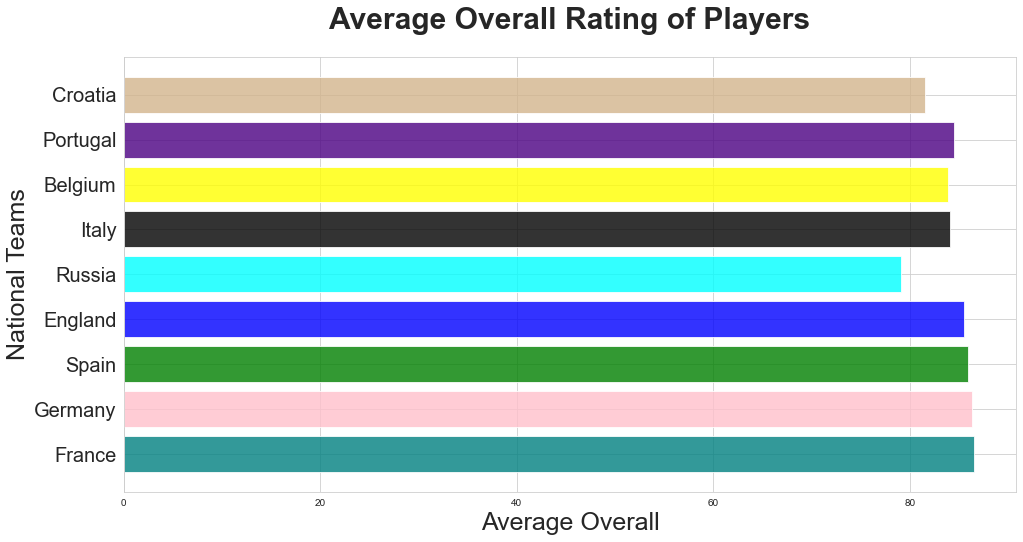

In [99]:
teams = ('France', 'Germany', 'Spain', 'England', 'Russia', 'Italy', 'Belgium', 'Portugal', 'Croatia')
index = np.arange(len(teams))
average_overall = [86.5, 86.3, 85.9, 85.5, 79.1, 84.1, 83.9, 84.5, 81.5]

plt.figure(figsize=(16,8))
plt.barh(index, average_overall, align='center', alpha=0.8, color=['teal', 'pink', 'green', 'blue', 'cyan', 'black', 'yellow', 'indigo', 'tan'])
plt.yticks(index, teams, fontsize=20)
plt.ylabel('National Teams', fontsize=25)
plt.xlabel('Average Overall', fontsize=25)
plt.title('Average Overall Rating of Players', fontsize=30, fontweight='bold', y=1.05,)
 
plt.show()

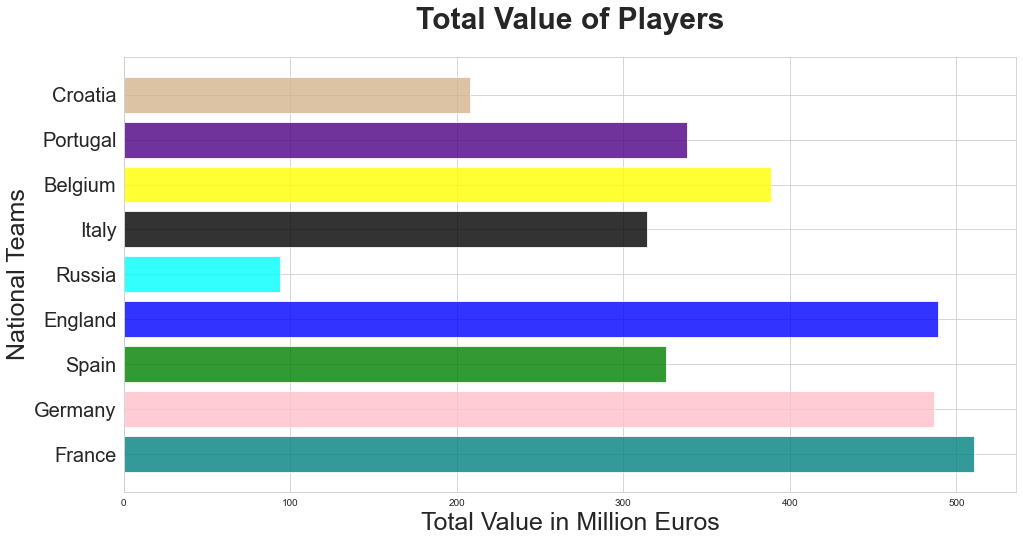

In [101]:

total_value = [510.5, 486.5, 325.5, 489, 94.1, 314, 388.5, 338.1, 208]

plt.figure(figsize=(16,8))
plt.barh(index, total_value, align='center', alpha=0.8, color=['teal', 'pink', 'green', 'blue', 'cyan', 'black', 'yellow', 'indigo', 'tan'])
plt.yticks(index, teams, fontsize=20)
plt.ylabel('National Teams', fontsize=25)
plt.xlabel('Total Value in Million Euros', fontsize=25)
plt.title('Total Value of Players', fontsize=30, fontweight='bold', y=1.05,)
 
plt.show()

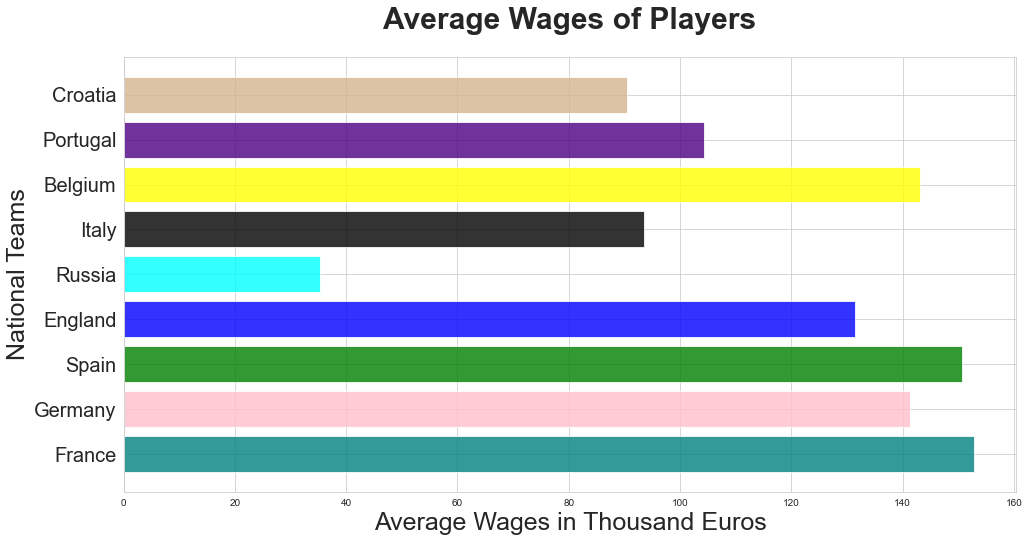

In [103]:
average_wage = [1681/11, 1554/11, 1657/11, 1446/11, 388/11, 1029/11, 1574/11, 1148/11, 995/11]

plt.figure(figsize=(16,8))
plt.barh(index, average_wage, align='center', alpha=0.8, color=['teal', 'pink', 'green', 'blue', 'cyan', 'black', 'yellow', 'indigo', 'tan'])
plt.yticks(index, teams, fontsize=20)
plt.ylabel('National Teams', fontsize=25)
plt.xlabel('Average Wages in Thousand Euros', fontsize=25)
plt.title('Average Wages of Players', fontsize=30, fontweight='bold', y=1.05,)
 
plt.show()

<br>


## Conclusion

So, only on the basis of the **FIFA 21 Data**:

The greatest overall ranking goes to France, followed by Germany and Spain.
The largest overall value is in France, followed by England and Germany.
The highest average pay is in France, followed by Spain and Belgium.

**France vs. Germany** in the final and **Spain vs. England** for third place are the best bets based on Fifa21 data.

Using the analysis France has the highest value, highest rating and highest pay; rating on the fact that they just own the World cup, france has the highest probalibity to win the EUROs, but dont shocked if Portugal pulls another miracle.